In [20]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [21]:
file = 'avm.wav'
sig , sr = librosa.load(file,mono=True,sr=None)

In [4]:
print(sr)

44100


In [5]:
hop_length = 1024

In [6]:
1024/sr*1000

23.219954648526077

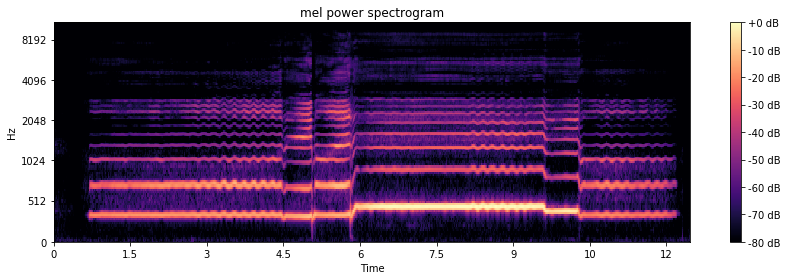

In [8]:
## From librosa demo: http://nbviewer.jupyter.org/github/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y=sig, sr=sr,n_fft=2048, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

Text(0,0.5,'MFCCs (1:256)')

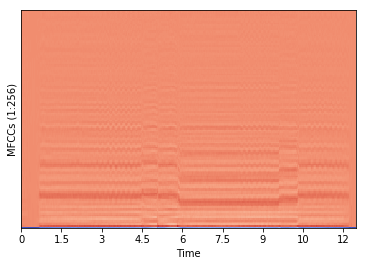

In [10]:
# librosa MFCC function
mfcc = librosa.feature.mfcc(y=sig, sr=sr, hop_length=hop_length, n_mfcc=256)
librosa.display.specshow(mfcc,x_axis='time')
plt.ylabel('MFCCs (1:256)')

NameError: name 'sig_harmonic' is not defined

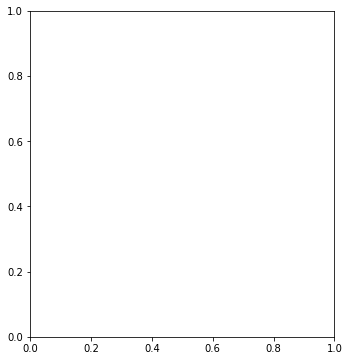

In [11]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)

#stft chroma
stftChroma = librosa.feature.chroma_stft(y=sig_harmonic,sr=sr, n_chroma=12)
librosa.display.specshow(stftChroma, y_axis='chroma', sr=sr,vmin=0.0, vmax=1.0, x_axis='time')

plt.subplot(1,2,2)

#cqt chroma
cqtChroma = librosa.feature.chroma_cqt(y=sig_harmonic,sr=sr,n_chroma=12)
librosa.display.specshow(cqtChroma, y_axis='chroma', sr=sr,vmin=0.0, vmax=1.0, x_axis='time')

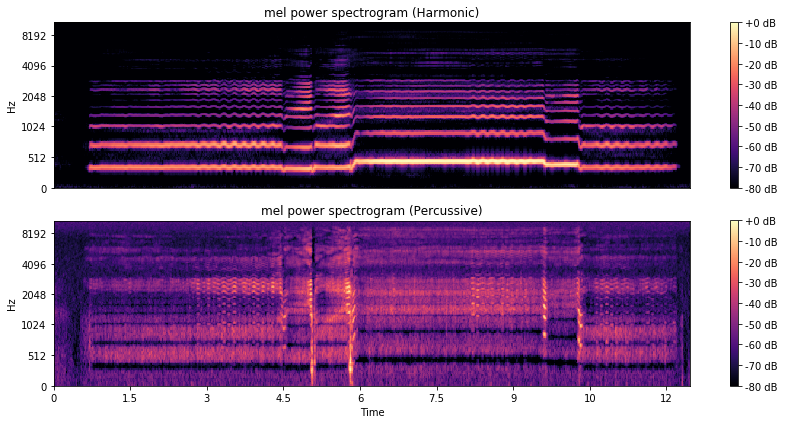

In [12]:
## From librosa demo: http://nbviewer.jupyter.org/github/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb

sig_harmonic, sig_percussive = librosa.effects.hpss(sig)

S_harmonic   = librosa.feature.melspectrogram(sig_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(sig_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

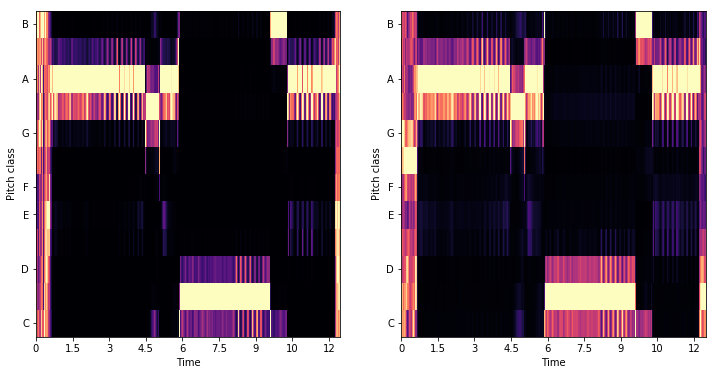

In [13]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)

#stft chroma
stftChroma = librosa.feature.chroma_stft(y=sig_harmonic,sr=sr, n_chroma=12)
librosa.display.specshow(stftChroma, y_axis='chroma', sr=sr,vmin=0.0, vmax=1.0, x_axis='time')

plt.subplot(1,2,2)

#cqt chroma
cqtChroma = librosa.feature.chroma_cqt(y=sig_harmonic,sr=sr,n_chroma=12)
librosa.display.specshow(cqtChroma, y_axis='chroma', sr=sr,vmin=0.0, vmax=1.0, x_axis='time')

Text(0,0.5,'MFCCs (1:256)')

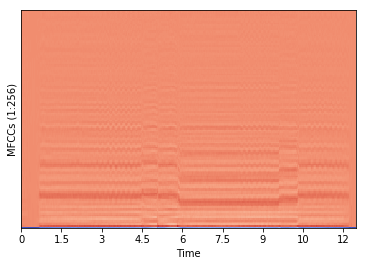

In [14]:
# librosa MFCC function
mfcc = librosa.feature.mfcc(y=sig, sr=sr, hop_length=hop_length, n_mfcc=256)
librosa.display.specshow(mfcc,x_axis='time')
plt.ylabel('MFCCs (1:256)')

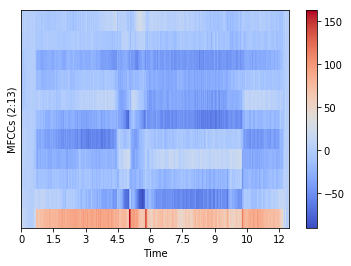

In [15]:
mfcc = librosa.feature.mfcc(y=sig, sr=sr, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(mfcc[1:12,:],x_axis='time')
plt.ylabel('MFCCs (2:13)')
plt.colorbar()

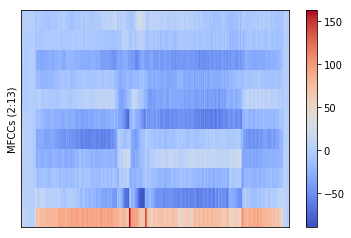

In [17]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's add on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc[1:12])
delta2_mfcc = librosa.feature.delta(mfcc[1:12], order=2)
librosa.display.specshow(mfcc[1:12])
plt.ylabel('MFCCs (2:13)')
plt.colorbar()


In [23]:
avmFile = 'avm.wav'


avmSig , sr = librosa.load(avmFile,mono=True,sr=None)


timeAvm=np.arange(0,avmSig.shape[0])/sr


Text(0.5,1,'avm Waveform')

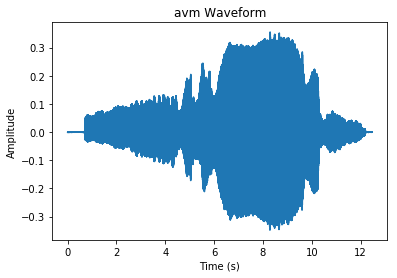

In [24]:
plt.plot(timeAvm,avmSig)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('avm Waveform')

In [26]:
avmSpec = librosa.amplitude_to_db(np.abs(librosa.stft(avmSig)), ref=np.max)

Text(0.5,1,'Log-frequency power spectrogram')

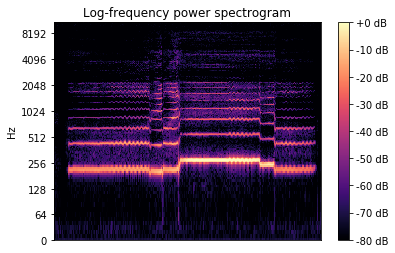

In [27]:
librosa.display.specshow(avmSpec, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

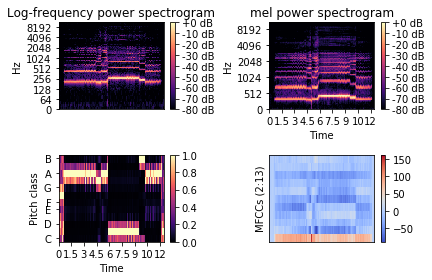

In [35]:
plt.figure()

plt.subplot(2,2,1)

librosa.display.specshow(avmSpec, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')


plt.subplot(2,2,2)

S = librosa.feature.melspectrogram(y=sig, sr=sr,n_fft=2048, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,2,3)

cqtChroma = librosa.feature.chroma_cqt(y=sig_harmonic,sr=sr,n_chroma=12)
librosa.display.specshow(cqtChroma, y_axis='chroma', sr=sr,vmin=0.0, vmax=1.0, x_axis='time')
plt.colorbar()


plt.subplot(2,2,4)


mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

librosa.display.specshow(mfcc[1:12])
plt.ylabel('MFCCs (2:13)')
plt.colorbar()



plt.tight_layout()